## Segmentation Data - Legend

The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical 'FMCG' store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed, and there are no missing values. In addition, the volume of the dataset has been restricted and anonymized to protect the privacy of the customers.

### Variable Descriptions

| Variable        | Data type   | Range        | Description                                                                                     |
|-----------------|-------------|--------------|-------------------------------------------------------------------------------------------------|
| ID              | numerical   | Integer      | Shows a unique identifier of a customer.                                                        |
| Sex             | categorical | {0, 1}       | Biological sex (gender) of a customer. In this dataset, there are only 2 different options.   |
|                 |             |              | 0: Male                                                                                        |
|                 |             |              | 1: Female                                                                                      |
| Marital status  | categorical | {0, 1}       | Marital status of a customer.                                                                  |
|                 |             |              | 0: Single                                                                                      |
|                 |             |              | 1: Non-single (divorced / separated / married / widowed)                                      |
| Age             | numerical   | Integer      | The age of the customer in years, calculated as current year minus the year of birth.         |
|                 |             |              | Min value: 18 (the lowest age observed in the dataset)                                        |
|                 |             |              | Max value: 76 (the highest age observed in the dataset)                                       |
| Education       | categorical | {0, 1, 2, 3} | Level of education of the customer.                                                            |
|                 |             |              | 0: Other / Unknown                                                                             |
|                 |             |              | 1: High School                                                                                 |
|                 |             |              | 2: University                                                                                  |
|                 |             |              | 3: Graduate School                                                                             |
| Income          | numerical   | Real         | Self-reported annual income in US dollars of the customer.                                    |
|                 |             |              | Min value: 35,832 (the lowest income observed in the dataset)                                 |
|                 |             |              | Max value: 309,364 (the highest income observed in the dataset)                               |
| Occupation      | categorical | {0, 1, 2}   | Category of occupation of the customer.                                                        |
|                 |             |              | 0: Unemployed / Unskilled                                                                      |
|                 |             |              | 1: Skilled Employee / Official                                                                 |
|                 |             |              | 2: Management / Self-employed / Highly Qualified Employee / Officer                           |
| Settlement size | categorical | {0, 1, 2}   | The size of the city that the customer lives in.                                              |
|                 |             |              | 0: Small City                                                                                  |
|                 |             |              | 1: Mid-sized City                                                                              |
|                 |             |              | 2: Big City                                                                                    |


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate
from scipy import stats




In [3]:
df = pd.read_csv('../data/raw/segmentation data.csv', index_col=[0])
data = df.copy()

In [5]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [6]:
data.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [8]:
data.isna().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [9]:
categorical_features = ["Sex", "Marital status", "Education", "Occupation", "Settlement size"]
for feature in categorical_features:
    feature_counts = data[feature].value_counts()
    feature_percentages = data[feature].value_counts(normalize=True) * 100

    print(f"\n{feature} counts:")
    print(tabulate(pd.DataFrame(feature_counts), headers="keys", tablefmt="psql"))

    print(f"\n{feature} percentages:")
    print(tabulate(pd.DataFrame(feature_percentages), headers="keys", tablefmt="psql"))


Sex counts:
+-------+---------+
|   Sex |   count |
|-------+---------|
|     0 |    1086 |
|     1 |     914 |
+-------+---------+

Sex percentages:
+-------+--------------+
|   Sex |   proportion |
|-------+--------------|
|     0 |         54.3 |
|     1 |         45.7 |
+-------+--------------+

Marital status counts:
+------------------+---------+
|   Marital status |   count |
|------------------+---------|
|                0 |    1007 |
|                1 |     993 |
+------------------+---------+

Marital status percentages:
+------------------+--------------+
|   Marital status |   proportion |
|------------------+--------------|
|                0 |        50.35 |
|                1 |        49.65 |
+------------------+--------------+

Education counts:
+-------------+---------+
|   Education |   count |
|-------------+---------|
|           1 |    1386 |
|           2 |     291 |
|           0 |     287 |
|           3 |      36 |
+-------------+---------+

Education percen

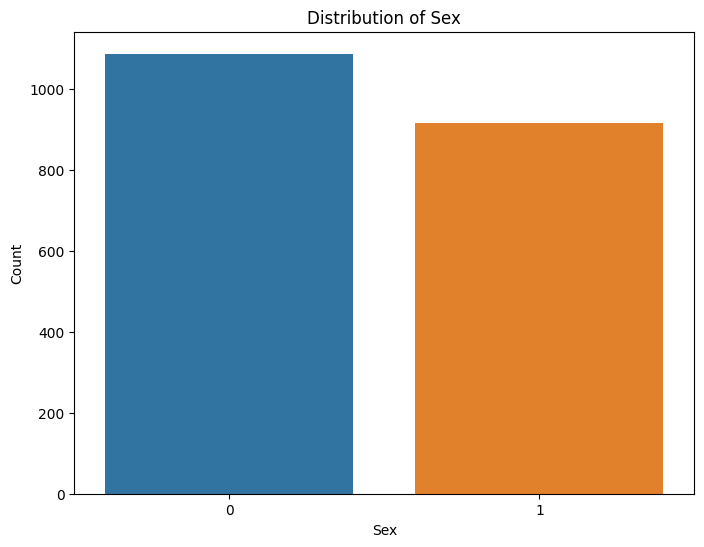

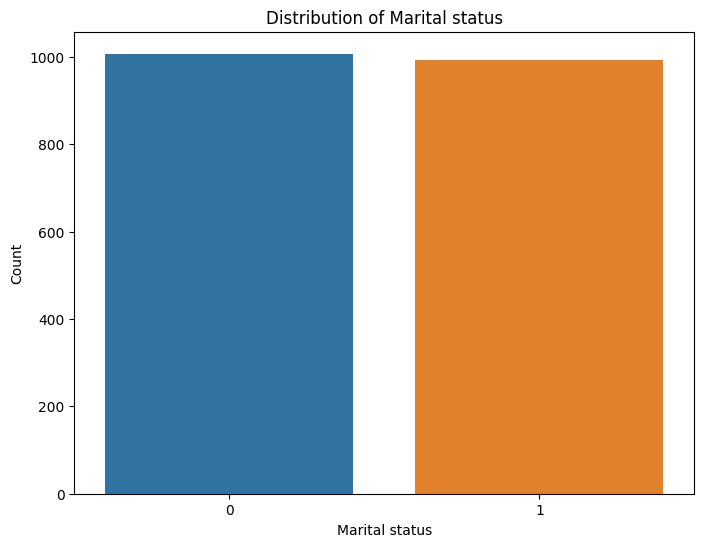

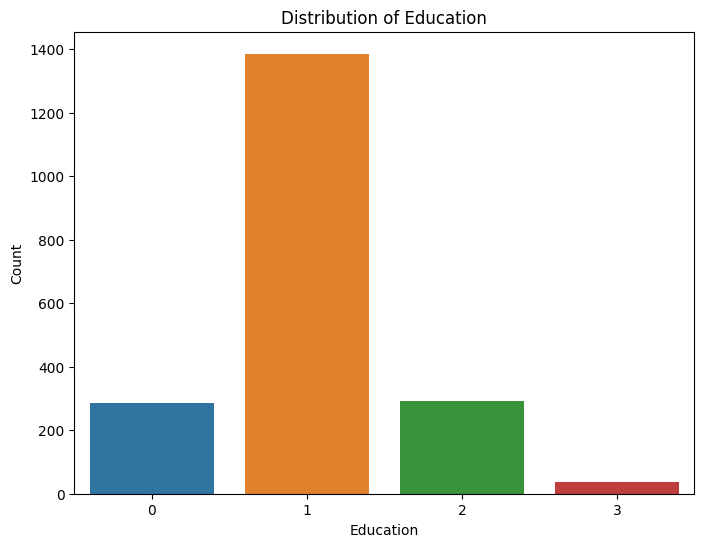

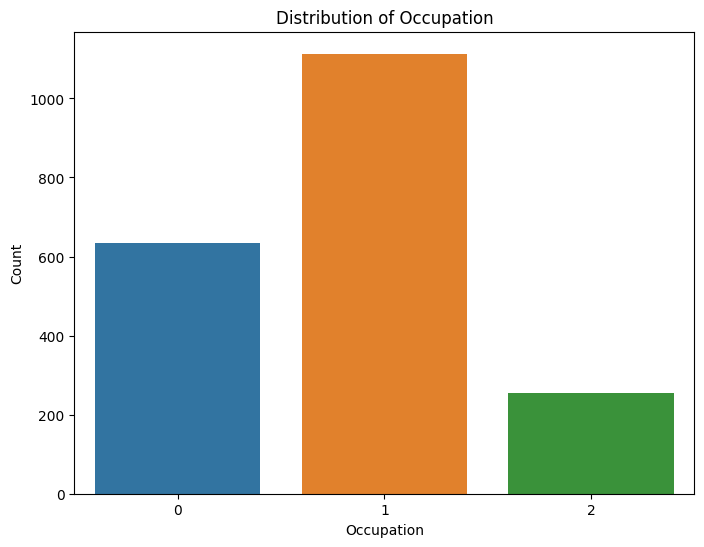

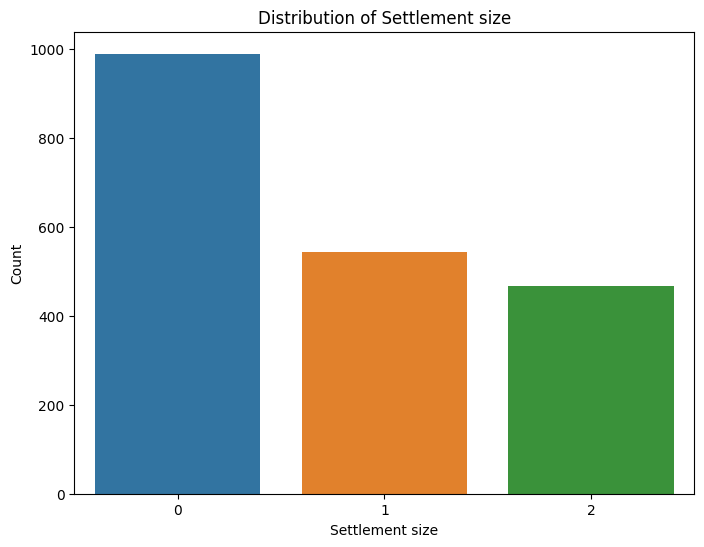

In [10]:

# Visualize the distribution of categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.savefig(f'../reports/figures/Distribution_of_{feature}')
    plt.show()


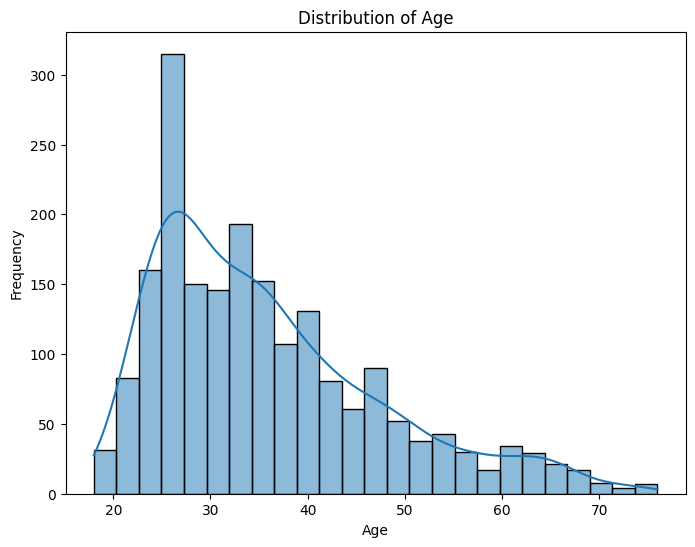

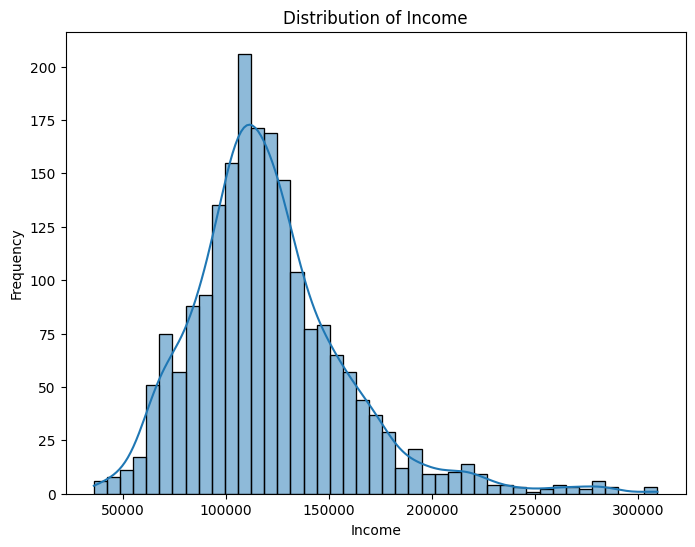

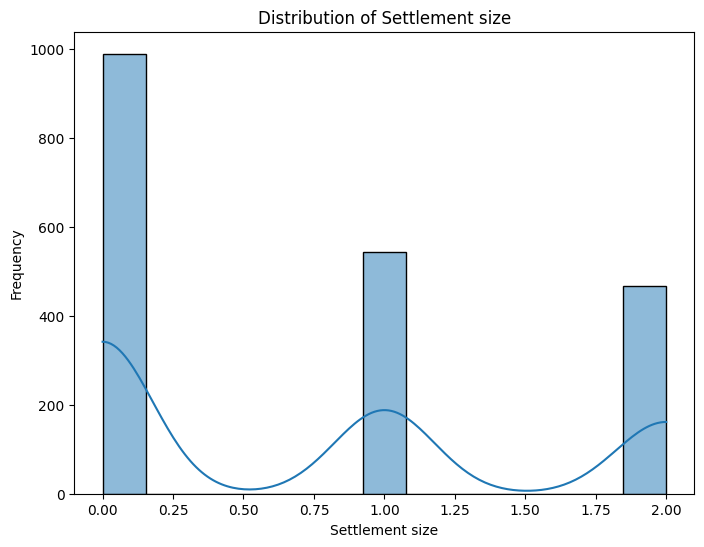

In [11]:

# Visualize the distribution of numerical features
numerical_features = ["Age", "Income", "Settlement size"]
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.savefig(f'../reports/figures/freq_dist_{feature}')
    plt.show()


In [12]:
grouped_data = data.groupby("Occupation").agg({
    "Age": "mean",
    "Income": "median",
    "Settlement size": "count"
}).reset_index()

print(grouped_data)


   Occupation        Age    Income  Settlement size
0           0  35.366509   87355.0              633
1           1  35.069182  120863.0             1113
2           2  40.940945  167539.0              254



## Hypothesis Testing
#### Null Hypotheses (Ho):

- For "Sex": There is no significant difference in income between male and female customers.
- For "Marital status": There is no significant difference in income between customers with different marital statuses.
- For "Occupation": There is no significant difference in income based on different categories of occupation.
- For "Settlement size": There is no significant difference in income based on the size of the city customers live in.


In [13]:

categorical_features = ["Sex", "Marital status", "Occupation", "Settlement size"]

for feature in categorical_features:
    # Group the data based on the current feature and calculate income groups
    feature_income_groups = [data[data[feature] == category]["Income"] for category in data[feature].unique()]
    
    # Perform one-way ANOVA test
    f_statistic, p_value = stats.f_oneway(*feature_income_groups)
    
    # Print the results
    print(f"\nHypothesis Test Result for {feature}:")
    print(f"F-statistic: {f_statistic:.2f}")
    print(f"P-value: {p_value:.4f}")



Hypothesis Test Result for Sex:
F-statistic: 79.10
P-value: 0.0000

Hypothesis Test Result for Marital status:
F-statistic: 10.86
P-value: 0.0010

Hypothesis Test Result for Occupation:
F-statistic: 895.03
P-value: 0.0000

Hypothesis Test Result for Settlement size:
F-statistic: 369.86
P-value: 0.0000


### Hypothesis Test Results:

#### Sex:
- F-statistic: 79.10
- P-value: 0.0000

The one-way ANOVA test was conducted to analyze if there is a significant difference in income between male and female customers. The calculated F-statistic is 79.10, indicating a large difference in income between the two groups. The extremely low P-value of 0.0000 suggests strong evidence against the null hypothesis. Therefore, we reject the null hypothesis, concluding that there is a significant difference in income based on the biological sex (gender) of the customers.

#### Marital status:
- F-statistic: 10.86
- P-value: 0.0010

The one-way ANOVA test was performed to examine whether there is a significant difference in income among customers with different marital statuses. The computed F-statistic is 10.86, indicating a moderate difference in income between the marital status groups. The resulting P-value of 0.0010 is below the common significance level (e.g., α = 0.05), providing strong evidence to reject the null hypothesis. Consequently, we can infer that there is a significant difference in income based on the marital status of the customers.

#### Occupation:
- F-statistic: 895.03
- P-value: 0.0000

An one-way ANOVA test was carried out to explore whether there is a significant difference in income among customers from different occupation categories. The calculated F-statistic is 895.03, indicating a substantial difference in income between the occupation groups. The P-value of 0.0000 is very low, leading to the rejection of the null hypothesis. Consequently, we can conclude that there is a significant difference in income based on the occupation category of the customers.

#### Settlement size:
- F-statistic: 369.86
- P-value: 0.0000

The one-way ANOVA test was employed to investigate if there is a significant difference in income based on the size of the city where the customers live. The computed F-statistic is 369.86, indicating a considerable difference in income between the settlement size groups. The P-value of 0.0000 is extremely low, providing compelling evidence to reject the null hypothesis. Hence, we can infer that there is a significant difference in income based on the settlement size of the customers.


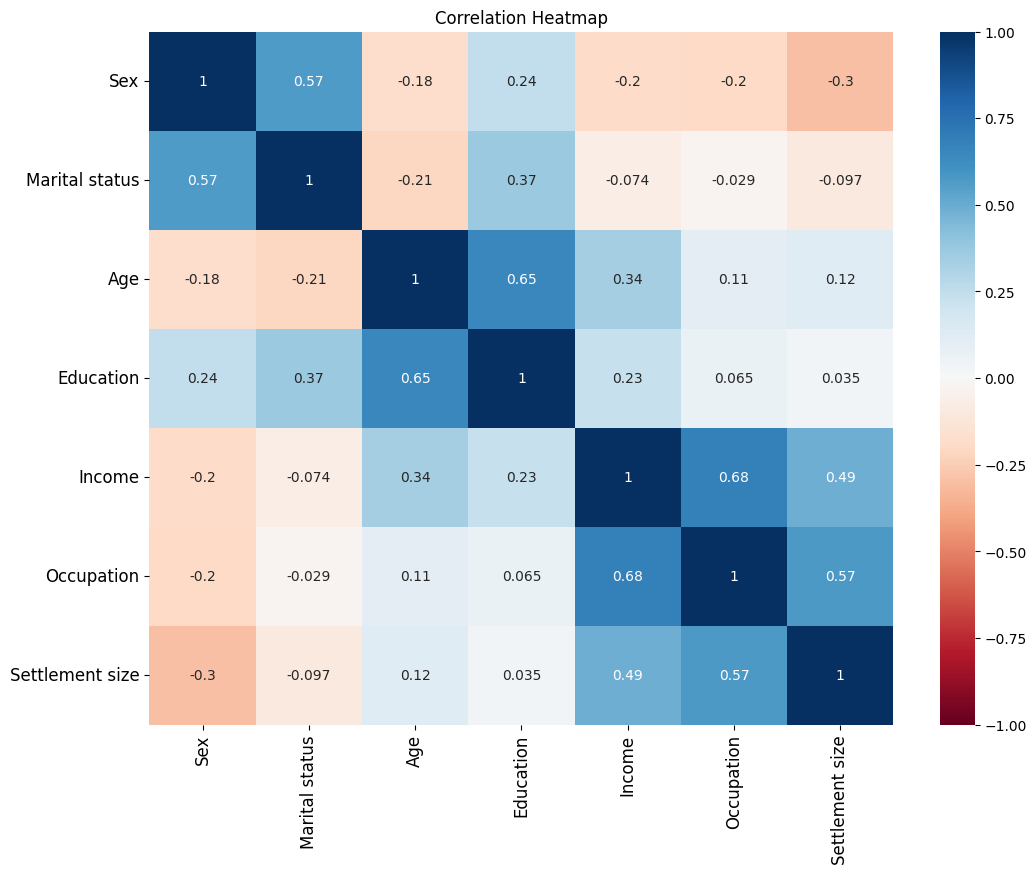

In [14]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(data.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.savefig('../reports/figures/corr_HeatMap.png')
plt.show()